**간단한 컨브넷 만들기**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
inputs = tf.keras.Input(shape=(28, 28, 1)) # (28, 28, 1) 형태의 3차원 텐서를 입력
#  32개의 3x3 크기의 필터를 사용하는 합성곱 레이어를 정의하고, 입력 이미지에 적용
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x) # 텐서를 1차원으로 평탄화해서 모든 픽셀 값들을 연속적인 벡터 형태로 변환
# 출력 레이어로 완전 연결 레이어로, 10개의 뉴런을 가지며 각 뉴런은 이미지가 특정 클래스에 속할 확률을 출력
outputs = layers.Dense(10, activation="softmax")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

**모델의 `summary()` 메서드 출력**

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          11,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

**MNIST 이미지에서 컨브넷 훈련하기**

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8801 - loss: 0.3755
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9851 - loss: 0.0477
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9908 - loss: 0.0301
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9936 - loss: 0.0212
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9954 - loss: 0.0161


**컨브넷 평가하기**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9897 - loss: 0.0310
테스트 정확도: 0.992


### 소규모 데이터셋에서 밑바닥부터 컨브넷 훈련하기

### Kaggle 데이터 내려받기
1. 캐글 API Token 발급
- 캐글 사이트 account 페이지 이동 > API 섹션 내 CREATE NEW API TOKEN 클릭 > 다운로드된 파일 kaggle.json 확인

https://www.kaggle.com/settings

In [1]:
# colab에서 kaggle 설치
!pip install kaggle

In [2]:
# 이후에 google colab이 제공하는 file을 통해 kaggle json 업로드
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hwanwookchoi","key":"483c5fd9ecac3d4f91eb11af39f62056"}'}

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls

drive  kaggle.json  sample_data


권한을 세 자리로 나타내는 방식:
- 첫 번째 숫자 (6): **파일 소유자(owner)**에 대한 권한을 나타냅니다.
- 두 번째 숫자 (0): **그룹(group)**에 대한 권한을 나타냅니다.
- 세 번째 숫자 (0): **기타 사용자(others)**에 대한 권한을 나타냅니다.

각 숫자는 다음과 같이 구성됩니다:
- 4: 읽기 권한 (read)
- 2: 쓰기 권한 (write)
- 1: 실행 권한 (execute)
- 0: 아무 권한 없음

In [5]:
# .kaggle 디렉토리 생성
!mkdir -p ~/.kaggle

# json 파일 .kaggle 디렉토리로 이동
!cp kaggle.json ~/.kaggle/

# 권한 변경
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# 사용자의 홈 디렉토리(~) 내의 파일과 디렉토리 목록을 자세한 정보와 함께 나열
!ls ~/.kaggle/ -la

total 16
drwxr-xr-x 2 root root 4096 Sep 10 00:25 .
drwx------ 1 root root 4096 Sep 10 00:25 ..
-rw------- 1 root root   68 Sep 10 00:25 kaggle.json


In [7]:
# Kaggle CLI 도구는 Kaggle의 API를 사용하여 데이터셋을 다운로드하고, Kaggle 대회에 참가하며, 데이터셋을 업로드하는 등 다양한 기능을 제공
!pip install --upgrade kaggle

In [8]:
!kaggle --version

Kaggle API 1.6.17


In [9]:
!pip show kaggle

Name: kaggle
Version: 1.6.17
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: bleach, certifi, python-dateutil, python-slugify, requests, six, tqdm, urllib3
Required-by: 


https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats?rvi=1

Copy Api command > kaggle datasets download -d biaiscience/dogs-vs-cats

In [10]:
!kaggle datasets download -d biaiscience/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats
License(s): DbCL-1.0
 98% 802M/817M [00:07<00:00, 159MB/s]
100% 817M/817M [00:07<00:00, 116MB/s]


In [11]:
!ls

dogs-vs-cats.zip  drive  kaggle.json  sample_data


In [12]:
!unzip -qq dogs-vs-cats.zip # qq' 옵션은 'quiet' 모드로 unzip 명령어가 해제 과정의 세부 정보를 출력하지 않습니다.
# !unzip -qq train.zip

In [13]:
!ls

dogs-vs-cats.zip  drive  kaggle.json  sample_data  test  train


In [14]:
!ls train

train


In [15]:
!mv train train1
!mv test test1

In [16]:
!ls

dogs-vs-cats.zip  drive  kaggle.json  sample_data  test1  train1


In [17]:
!mv /content/train1/train /content/
!mv /content/test1/test /content/

In [18]:
!rm -rf test1 train1

In [19]:
!ls

dogs-vs-cats.zip  drive  kaggle.json  sample_data  test  train


In [20]:
!ls train/

cat.0.jpg      cat.1966.jpg  cat.5180.jpg  cat.8396.jpg   dog.1160.jpg	 dog.3575.jpg  dog.6790.jpg
cat.10000.jpg  cat.1967.jpg  cat.5181.jpg  cat.8397.jpg   dog.11610.jpg  dog.3576.jpg  dog.6791.jpg
cat.10001.jpg  cat.1968.jpg  cat.5182.jpg  cat.8398.jpg   dog.11611.jpg  dog.3577.jpg  dog.6792.jpg
cat.10002.jpg  cat.1969.jpg  cat.5183.jpg  cat.8399.jpg   dog.11612.jpg  dog.3578.jpg  dog.6793.jpg
cat.10003.jpg  cat.196.jpg   cat.5184.jpg  cat.839.jpg	  dog.11613.jpg  dog.3579.jpg  dog.6794.jpg
cat.10004.jpg  cat.1970.jpg  cat.5185.jpg  cat.83.jpg	  dog.11614.jpg  dog.357.jpg   dog.6795.jpg
cat.10005.jpg  cat.1971.jpg  cat.5186.jpg  cat.8400.jpg   dog.11615.jpg  dog.3580.jpg  dog.6796.jpg
cat.10006.jpg  cat.1972.jpg  cat.5187.jpg  cat.8401.jpg   dog.11616.jpg  dog.3581.jpg  dog.6797.jpg
cat.10007.jpg  cat.1973.jpg  cat.5188.jpg  cat.8402.jpg   dog.11617.jpg  dog.3582.jpg  dog.6798.jpg
cat.10008.jpg  cat.1974.jpg  cat.5189.jpg  cat.8403.jpg   dog.11618.jpg  dog.3583.jpg  dog.6799.jpg
cat.

**이미지를 훈련, 검증, 테스트 디렉토리로 복사하기**

코드를 실행하면, 'cats_vs_dogs_small' 디렉토리 아래에 'cat'과 'dog' 각각의 이미지가 포함된 'train', 'validation', 'test' 세 개의 서브 디렉토리가 생성됩니다. 이렇게 하면 원본 이미지 데이터셋의 일부를 추출하여 새로운, 더 작은 데이터셋을 만드는 데 유용

In [21]:
# 원본 이미지 데이터셋에서 일부 데이터를 추출하여 새로운 하위 데이터셋을 생성.
# 이 하위 데이터셋은 훈련, 검증, 테스트의 세 가지 부분으로 구성
import os, shutil, pathlib

# pathlib의 주요 기능으로는 경로 조작, 파일 시스템 정보 조회, 파일/디렉토리 생성 및 삭제 등이 있습니다.
original_dir = pathlib.Path("train") # 'train' 폴더를 원본 데이터셋의 디렉토리로 설정
new_base_dir = pathlib.Path("cats_vs_dogs_small") # 'cats_vs_dogs_small' 폴더를 새로운 데이터셋의 베이스 디렉토리로 설정

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"): # 각 카테고리에 대해 작업을 수행
        dir = new_base_dir / subset_name / category # 각 카테고리의 새로운 디렉토리 경로를 생성
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, # shutil.copyfile을 사용하여 원본 디렉토리에서 새 디렉토리로 이미지 파일을 복사
                            dst=dir / fname) # 원본 디렉토리에서 해당 파일을 복사하여 새 디렉토리에 붙여넣기

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [ ]:
!ls cats_vs_dogs_small/

test  train  validation


### 모델 만들기

**강아지 vs. 고양이 분류를 위한 소규모 컨브넷 만들기**

In [23]:
import tensorflow as tf
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=(180, 180, 3)) # 높이와 너비가 각각 180 픽셀이며 3개의 채널(RGB)을 가진 이미지 입력
x = layers.Rescaling(1./255)(inputs) # 입력 이미지의 픽셀 값을 [0, 1] 범위로 재조정
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x) # 32개의 필터를 사용하며, 각 필터의 크기는 3x3
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [24]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

**모델 훈련 설정하기**

In [25]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

RMSprop (Root Mean Square Propagation)
- RMSprop은 적응적 학습률을 사용하여 가중치 업데이트를 할 때 각 매개변수에 대해 개별적인 학습률을 적용합니다. 기본 아이디어는 각 매개변수의 그라디언트의 최근 크기를 사용해 학습률을 조정하는 것입니다. 이 방식은 그라디언트가 크게 변동하는 경우 학습률을 낮추고, 그라디언트가 안정되면 학습률을 높이는 효과가 있습니다.

Adam (Adaptive Moment Estimation)
- Adam은 RMSprop의 장점에 **모멘텀(Momentum)**의 개념을 추가한 알고리즘입니다. 그라디언트의 1차 모멘트(평균)와 2차 모멘트(제곱 평균)을 모두 추적합니다. 즉, 그라디언트의 크기와 방향을 모두 고려하여 가중치를 업데이트합니다. 이러한 방식은 RMSprop보다 더 안정적이고 빠른 수렴을 가능하게 합니다.

### 데이터 전처리

**`image_dataset_from_directory`를 사용하여 이미지 읽기**

TensorFlow Keras의 image_dataset_from_directory 함수를 사용하여 디렉토리에 저장된 이미지 데이터로부터 데이터셋을 생성

In [26]:
from tensorflow.keras.utils import image_dataset_from_directory

# 'new_base_dir / "train"' 경로에서 훈련 데이터셋을 생성.
# 여기서 각 이미지의 크기는 180x180으로 조정되며, 한 번에 32개의 이미지를 포함하는 배치(batch)가 생성
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [27]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

**`Dataset`이 반환하는 데이터와 레이블 크기 확인하기**

In [28]:
for data_batch, labels_batch in train_dataset:
    print("데이터 배치 크기:", data_batch.shape)
    print("레이블 배치 크기:", labels_batch.shape)
    break

데이터 배치 크기: (32, 180, 180, 3)
레이블 배치 크기: (32,)


**`Dataset`을 사용해 모델 훈련하기**

In [ ]:
# ModelCheckpoint 콜백을 사용하여 훈련 도중에 모델을 저장
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras", # 저장된 파일의 이름
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

**훈련 정확도와 손실 그래프 그리기**

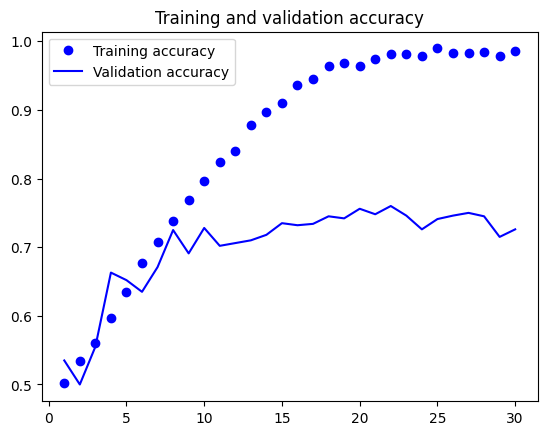

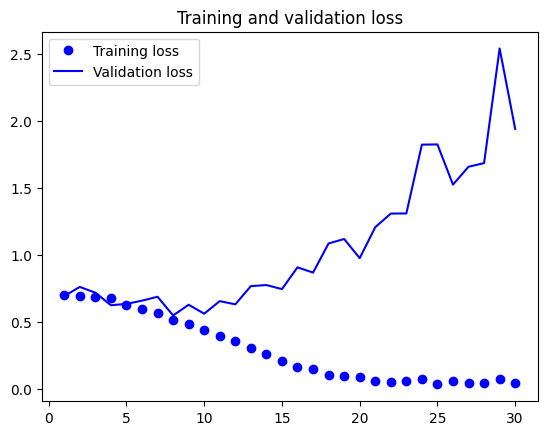

In [31]:
import matplotlib.pyplot as plt
plt.clf()
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [41]:
for layer in model.layers:
    if hasattr(layer, 'kernel_initializer') and hasattr(layer, 'bias_initializer'):
        layer.kernel.assign(layer.kernel_initializer(layer.kernel.shape))
        layer.bias.assign(layer.bias_initializer(layer.bias.shape))


callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",  # 저장된 파일의 이름
        save_best_only=True,
        monitor="val_loss"
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",  # 모니터링할 지표
        patience=5,  # 개선이 없을 때 몇 번의 에포크를 더 진행할지 (여기서는 3번)
        restore_best_weights=True  # 최상의 가중치를 복원할지 여부
    )
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.5074 - loss: 0.6988 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.5212 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6989
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.5458 - loss: 0.6914 - val_accuracy: 0.5000 - val_loss: 2.4298
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.6114 - loss: 0.7675 - val_accuracy: 0.6270 - val_loss: 0.6343
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.6433 - loss: 0.6180 - val_accuracy: 0.6130 - val_loss: 0.7612
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6671 - loss: 0.6003 - val_accuracy: 0.6700 - val_loss: 0.5941
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.7140 - loss: 0.5566 - val_accuracy: 0.7190 - val_loss: 0.5729
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.7304 - loss: 0.5342 - val_accuracy: 0.7060 -

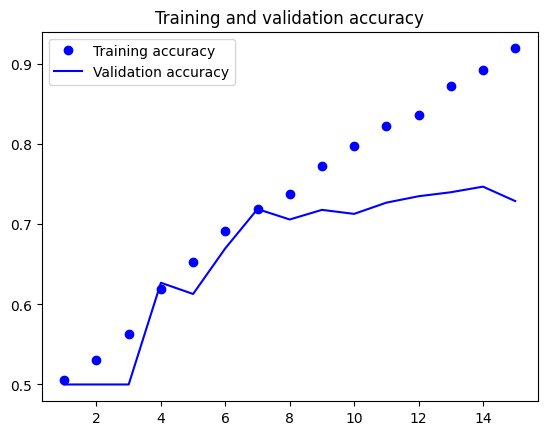

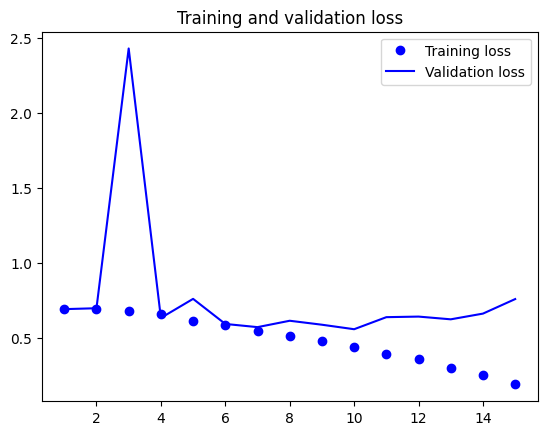

In [42]:
import matplotlib.pyplot as plt
plt.clf()
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [43]:
!ls

cats_vs_dogs_small	    dogs-vs-cats.zip  kaggle.json  test
convnet_from_scratch.keras  drive	      sample_data  train


In [44]:
test_model = tf.keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.7112 - loss: 0.5975
테스트 정확도: 0.721


**컨브넷에 추가할 데이터 증식 단계 정의하기**

세 가지 데이터 증강 기법

- layers.RandomFlip("horizontal"): 이미지를 수평 방향으로 무작위로 뒤집습니다. 이는 이미지에 대한 모델의 위치 불변성을 증가시키는 데 도움이 됩니다.

- layers.RandomRotation(0.1): 이미지를 최대 0.1 라디안(약 5.7도) 범위에서 무작위로 회전시킵니다. 회전은 중심을 기준으로 하며, 빈 영역은 근접한 픽셀로 채워집니다.

- layers.RandomZoom(0.2): 이미지를 최대 20% 범위에서 무작위로 확대/축소합니다. 빈 영역은 근접한 픽셀로 채워집니다.

In [48]:
# 데이터 증강 레이어
data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

##### 랜텀하게 증신된 훈련 이미지 출력하기

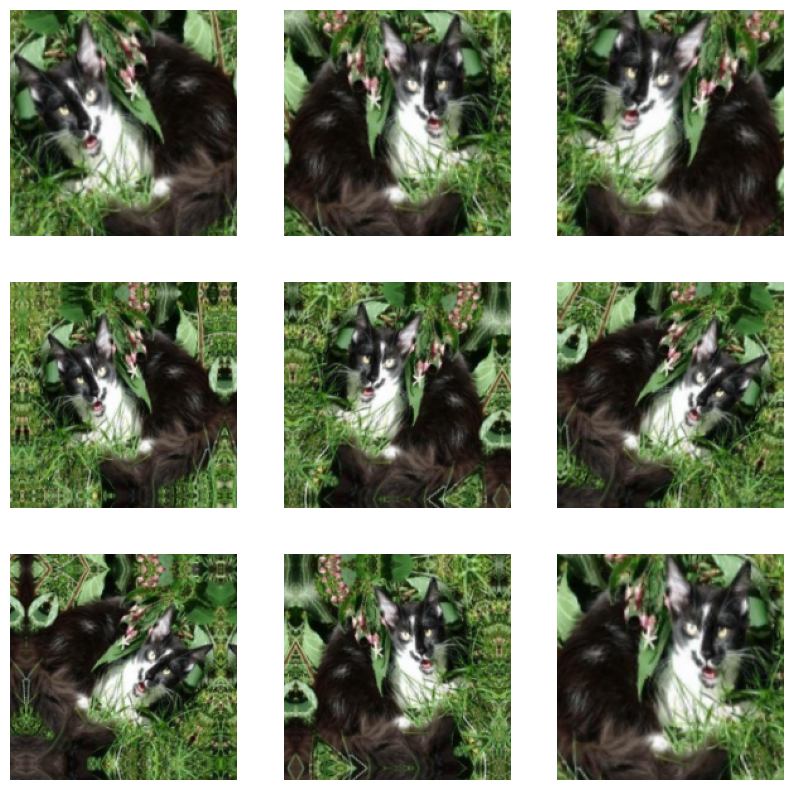

In [47]:
## 랜덤하게 그림 하나를 가져와서 순차적으로 9번을 증식
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):   # 학습데이터셋에서 하나의 배치를 가져옴
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        ## unit8은 0부터 255까지의 값을 가질 수 있는 8비트 정수 타입을 의미, 이는 이미지 데이터를 표현하는데 일반적으로 사용되는 데이터 타입
        ## astype('unit8')을 호출함으로써 이미지 데이터가 해당 범위내에 있도록 보장
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

#### 이미지 증식과 드롭아웃을 포함한 컨브넷 만들기
- epoch 마다 입력 데이터를 무작위로 변형하여 모델이 다양한 데이터를 학습하도록 도와주지만, 실제 데이터 수는 증식 전과 동일하게 유지

In [51]:
# 모델 구성
inputs=tf.keras.Input(shape=(180, 180, 3))
x=data_augmentation(inputs)
x=layers.Rescaling(1./255)(x)
x=layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x=layers.Flatten()(x)
x=layers.Dropout(0.5)(x)
outputs=layers.Dense(1, activation="sigmoid")(x)
model=tf.keras.Model(inputs=inputs, outputs=outputs)

# 모델 컴파일
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.9289 - loss: 0.1905 - val_accuracy: 0.8170 - val_loss: 0.6437
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.9119 - loss: 0.2089 - val_accuracy: 0.7830 - val_loss: 0.9942
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.9172 - loss: 0.2008 - val_accuracy: 0.8420 - val_loss: 0.6567
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9449 - loss: 0.1518 - val_accuracy: 0.8180 - val_loss: 0.5842
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.9374 - loss: 0.1931 - val_accuracy: 0.8130 - val_loss: 1.0451
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.9356 - loss: 0.1748 - val_accuracy: 0.8330 - val_loss: 0.7668
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - accuracy: 0.9315 - loss: 0.2019 - val_accuracy: 0.8390 - val_loss: 0.7352
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.9236 - loss: 0.2032 - val_accuracy: 

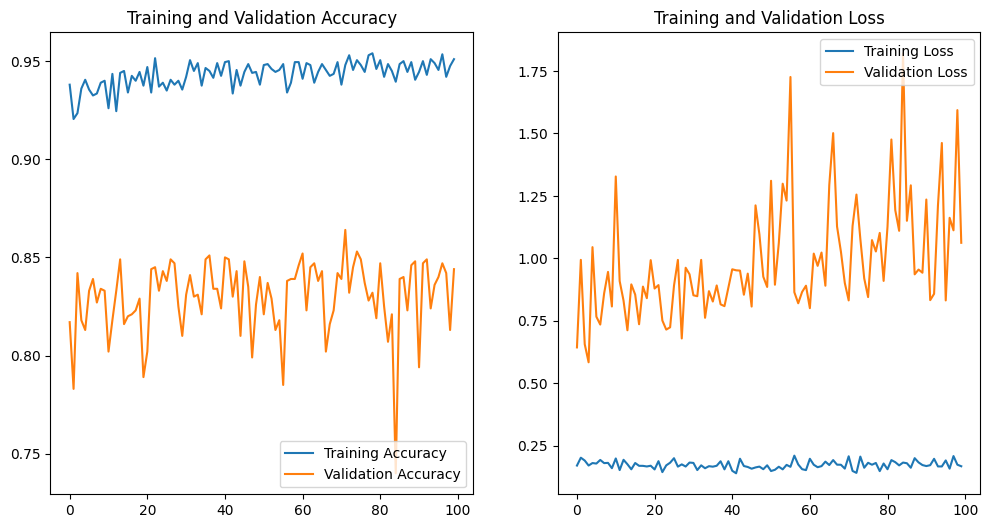

In [61]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras", # 저장된 파일의 이름
        save_best_only=True,
        monitor="val_loss")
]

# 모델 훈련
history = model.fit(
    train_dataset,  # 훈련 데이터셋
    epochs=100,  # 100번의 에포크로 훈련
    validation_data=validation_dataset,  # 검증 데이터셋
    callbacks=callbacks
)

# 결과 시각화
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

# 학습 결과 시각화
plot_history(history)

In [59]:
!ls

cats_vs_dogs_small	    dogs-vs-cats.zip  kaggle.json  test
convnet_from_scratch.keras  drive	      sample_data  train


In [64]:
test_model = tf.keras.models.load_model("convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8232 - loss: 0.5649
테스트 정확도: 0.829


# 전이 학습

**전이 학습(Transfer Learning)**은 **이미 훈련된 모델**의 가중치를 새로운 문제에 적용하여 **재학습**하는 방법입니다. 이 방법은 특히 **큰 데이터셋**과 **복잡한 모델**이 필요한 딥러닝에서 매우 유용합니다. 전이 학습의 핵심 개념은 **한 도메인에서 학습한 지식을 다른 도메인**에 전이하는 것입니다.

### 전이 학습의 주요 아이디어
일반적으로 전이 학습은 다음과 같은 흐름을 따릅니다:

1. **사전 훈련된 모델 사용**:
   - 전이 학습에서 사전 훈련된 모델은 보통 **ImageNet** 같은 대규모 데이터셋에서 학습된 모델을 의미합니다.
   - 예를 들어, **VGG16**, **ResNet**, **Inception**과 같은 딥러닝 모델들은 수백만 개의 이미지를 사용해 사물 분류에 대한 특징을 학습한 상태입니다.

2. **특징 추출**:
   - 사전 훈련된 모델의 **초기 계층(저수준 특징 추출기)**은 **경계선, 질감, 색상**과 같은 일반적인 특징을 학습합니다.
   - 이 부분을 유지하면서, 특정 문제에 맞게 **모델의 상단 층**(보통 **분류기 층**)을 재구성하여 새로운 데이터셋에 맞는 분류를 학습시킬 수 있습니다.

3. **미세 조정(Fine-tuning)**:
   - 전이 학습에서 일반적으로 모델의 상단 일부만을 새 데이터셋에 맞게 재학습(fine-tuning)하거나, 사전 훈련된 가중치를 **고정(freeze)**하고 최상단 분류층만 학습시키는 방식이 사용됩니다.
   - 일부 경우에는 사전 훈련된 모델 전체에 대해 **미세 조정(fine-tuning)**을 수행하여 모델이 새로운 데이터셋에 맞게 더욱 잘 적응할 수 있도록 합니다.

### 전이 학습의 주요 단계

1. **사전 훈련된 모델 로드**:
   - ImageNet과 같은 대규모 데이터셋으로 학습된 모델을 로드합니다.
   - 모델의 구조와 가중치를 가져옵니다. 이때, `include_top=False`로 설정하여 모델의 마지막 분류층을 제외하고, 특징 추출에만 사용되는 합성곱 계층들을 사용할 수 있습니다.

2. **모델 동결(Freeze)**:
   - 학습된 가중치를 **고정(freeze)**하여 초기 계층의 가중치가 업데이트되지 않도록 설정합니다. 이는 모델이 기존 학습된 정보를 유지하면서 새로운 데이터셋에 적응하도록 하기 위함입니다.

3. **새 분류기 추가**:
   - 사전 훈련된 모델의 마지막 계층 위에 **새로운 분류기**(Dense Layer나 Softmax Layer 등)를 추가하여, 새로운 문제에 맞는 레이블로 모델이 학습할 수 있도록 합니다.
   - 예를 들어, 고양이와 개를 분류하는 문제라면 두 개의 출력 뉴런을 가진 분류층을 추가할 수 있습니다.

4. **새 데이터로 학습**:
   - 새로운 데이터셋을 사용해 모델을 **재학습**합니다. 이때, 일부 계층은 고정된 채로 유지하고, 새로운 분류기 층만 학습시키거나 전체 모델을 미세 조정할 수 있습니다.

### 전이 학습의 장점

1. **적은 데이터로도 학습 가능**:
   - 새로운 문제에 대해 학습할 때, 사전 훈련된 모델이 기존에 학습한 정보가 이미 포함되어 있으므로 **작은 데이터셋**으로도 좋은 성능을 얻을 수 있습니다. 이는 특히 대규모 데이터셋을 확보하기 어려운 경우에 유리합니다.

2. **시간과 자원 절약**:
   - 모델을 처음부터 학습시키지 않고 사전 훈련된 모델을 사용하므로 **훈련 시간과 자원**을 절약할 수 있습니다.

3. **성능 향상**:
   - 사전 훈련된 모델이 큰 데이터셋에서 학습한 **일반적인 패턴**을 활용할 수 있어, 더 빠르게 **좋은 성능**을 얻을 수 있습니다.

### 전이 학습의 예시

#### 1. **이미지 분류**
   - **ImageNet**에서 사전 훈련된 모델(VGG, ResNet 등)을 가져와, 다른 데이터셋(예: 고양이와 개를 구분하는 데이터셋)에서 학습을 수행할 수 있습니다.
   
#### 2. **객체 탐지(Object Detection)**
   - 전이 학습은 **YOLO**나 **Faster R-CNN** 같은 객체 탐지 모델에서도 사용됩니다. 사전 훈련된 모델을 기반으로 특정 도메인의 객체를 탐지하는 데 활용됩니다.

#### 3. **자연어 처리(NLP)**
   - NLP 분야에서는 **BERT**, **GPT**와 같은 사전 훈련된 모델이 다양한 언어 이해 및 생성 작업에 활용됩니다. 새로운 텍스트 데이터에 맞게 미세 조정하여 번역, 감정 분석, 텍스트 생성 등의 작업을 수행할 수 있습니다.

전이 학습은 **사전 훈련된 모델을 기반으로 새로운 문제를 해결**하는 방법으로, 특히 **소량의 데이터**로도 **효율적으로 학습**할 수 있는 방법입니다. 사전 훈련된 모델이 일반적인 패턴을 학습한 상태에서, 새로운 도메인에 맞게 상위층을 재학습하거나 전체 모델을 미세 조정하는 방식으로 사용됩니다. 전이 학습은 **이미지 분류**, **객체 탐지**, **자연어 처리** 등 다양한 딥러닝 분야에서 매우 널리 사용되고 있습니다.

## 사전 훈련된 모델 활용하기
#### 사전 훈련된 모델을 사용한 특성 추출

ImageNet 데이터셋

- ImageNet은 컴퓨터 비전 분야에서 매우 유명한 대규모 데이터셋입니다.
- 이 데이터셋은 1,000개의 클래스로 구성되어 있으며, 각 클래스에는 다양한 객체가 포함되어 있습니다. 예를 들어, 동물, 식물, 사물 등의 카테고리가 있습니다.
- 1,400만 개 이상의 이미지로 이루어져 있으며, 각 이미지에는 하나 이상의 객체에 대한 레이블이 붙어 있습니다.
- VGG16 모델은 **ILSVRC (ImageNet Large Scale Visual Recognition Challenge)**에서 사용된 1000개의 클래스에 대한 데이터를 사용해 훈련되었습니다. 이 챌린지는 이미지 분류, 객체 탐지 등의 다양한 비전 작업을 위한 벤치마크입니다.

**VGG16합성곱 기분 층 만들기**

include_top=False의 default 값은 True

- include_top=True: VGG16 모델의 마지막에 있는 완전 연결 분류기 층(3개의 Dense 층과 마지막 Softmax 층)이 포함됩니다. 이는 주로 ImageNet 데이터셋과 동일한 1,000개의 클래스를 분류할 때 사용됩니다.
- include_top=False: VGG16 모델의 상단 분류기 부분을 제외하고, 합성곱층 기반만을 사용합니다. 이 옵션은 특징 추출(feature extraction) 작업에 유용하며, 마지막 층을 사용자의 문제에 맞게 재구성하거나 새로운 분류기를 추가할 수 있습니다.

In [72]:
import tensorflow as tf
from tensorflow.keras import layers
conv_base=tf.keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [73]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

** VGG16 특성과 해당 레이블 추출하기**

In [67]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = tf.keras.applications.vgg16.preprocess_input(images)        ## VGG16 모델에 맞춰 이미지를 전처리하는 과정
        features=conv_base.predict(preprocessed_images)               ## 전처리된 이미지를 입력 받아 그에 대한 특징을 추출
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels) ## 각 배치마다 추출된 특징과 레이블을 결합
train_features,train_labels=get_features_and_labels(train_dataset)
val_features,val_labels=get_features_and_labels(validation_dataset)
test_features,test_labels=get_features_and_labels(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

In [65]:
train_features.shape

(2000, 5, 5, 512)

** 밀집연결 분류기를 정의하고 훈련하기**

In [68]:
inputs=tf.keras.Input(shape=(5, 5, 512))
x=layers.Flatten()(inputs)
x=layers.Dense(256)(x)
x=layers.Dropout(0.5)(x)
outputs=layers.Dense(1, activation="sigmoid")(x)
model=tf.keras.Model(inputs, outputs)

model.compile(loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_features,
    train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.8532 - loss: 25.5475 - val_accuracy: 0.9760 - val_loss: 2.4552
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9744 - loss: 3.5566 - val_accuracy: 0.9740 - val_loss: 4.1626
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9873 - loss: 1.4843 - val_accuracy: 0.9780 - val_loss: 2.7246
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9937 - loss: 1.0573 - val_accuracy: 0.9770 - val_loss: 4.3725
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9956 - loss: 0.4402 - val_accuracy: 0.9730 - val_loss: 5.2887
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9927 - loss: 0.5069 - val_accuracy: 0.9570 - val_loss: 7.7517
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9915 - loss: 0.5126 - val_accuracy: 0.9690 - val_loss: 5.2584
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9973 - loss: 0.3270 - val_accuracy: 0.9810 - val_los

In [71]:
## CF
import tensorflow as tf
from tensorflow.keras import layers
vgg16=tf.keras.applications.vgg16.VGG16(
    weights="imagenet",
    input_shape=(224, 224, 3))

vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

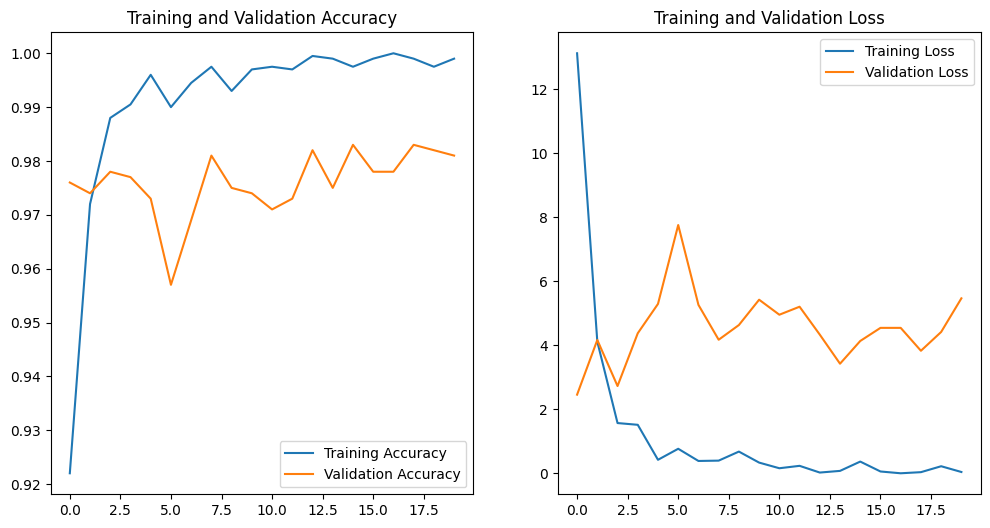

In [74]:
# 결과 시각화
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

# 학습 결과 시각화
plot_history(history)

In [75]:
test_model=tf.keras.models.load_model("feature_extraction.keras")
test_loss, test_acc=test_model.evaluate(test_features, test_labels)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9663 - loss: 4.5424
테스트 정확도: 0.973


##### One Cell 통합

In [79]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_model():
  ## 1. VGG16 모델 불러오기 (사전 훈련된 모델)
  conv_base=tf.keras.applications.vgg16.VGG16(
      weights="imagenet",           ## 이미지넷 가중치 사용
      include_top=False,            ## 분류기 (fully connected layer) 제외
      input_shape=(180, 180, 3))    ## 입력 이미지 크기

  ## 2. VGG16 가중치를 고정 (학습되지 않도록)
  conv_base.trainable=False

  ## 3. VGG16과 커스텀 분류기 연결 (함수형 api 이용)
  inputs = tf.keras.Input(shape=(180, 180, 3)) ## 입력 텐서
  x = conv_base(inputs)        #VGG16모델에 입력
  x = layers.Flatten()(x)     ## 3D 특징 맵을 1D로 변환
  x = layers.Dense(256, activation='relu')(x) ## 커스텀 분류기: fully connected layer
  x = layers.Dropout(0.5)(x)  ## drop out 레이어
  outputs = layers.Dense(1, activation="sigmoid")(x)   # 출력: 이진 분류


  ## 4. 전체 모델 정의
  model=models.Model(inputs, outputs)

  ## 5. 모델 컴파일
  model.compile(loss="binary_crossentropy",   ## 이진 분류를 위한 손실 함수
      optimizer="rmsprop",                    ## 옵티마이저
      metrics=["accuracy"])                   ## 평가 지표는 정확도

  return model


## 모델 생성
model=build_model()



## 6. 학습
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="fine_tuned_model.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset,  #################### 원래의 데이터셋 (학습데이터)
    epochs=20,
    validation_data=validation_dataset,  #################### 원래의 데이터셋 (검증데이터)
    callbacks=callbacks)


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 246ms/step - accuracy: 0.8118 - loss: 23.8057 - val_accuracy: 0.9200 - val_loss: 1.1636
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 187ms/step - accuracy: 0.9558 - loss: 0.6090 - val_accuracy: 0.9350 - val_loss: 0.5039
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 152ms/step - accuracy: 0.9600 - loss: 0.3861 - val_accuracy: 0.9510 - val_loss: 0.4418
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.9883 - loss: 0.0753 - val_accuracy: 0.9370 - val_loss: 0.6437
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 136ms/step - accuracy: 0.9894 - loss: 0.0623 - val_accuracy: 0.9390 - val_loss: 0.6596
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.9787 - loss: 0.1663 - val_accuracy: 0.9480 - val_loss: 0.5451
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.9876 - loss: 0.0791 - val_accuracy: 0.9480 - val_loss: 0.5752
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 139ms/step - accuracy: 0.9963 - loss: 0.0302 - val_acc

In [80]:
!ls

cats_vs_dogs_small			      drive			sample_data
convnet_from_scratch.keras		      feature_extraction.keras	test
convnet_from_scratch_with_augmentation.keras  fine_tuned_model.keras	train
dogs-vs-cats.zip			      kaggle.json


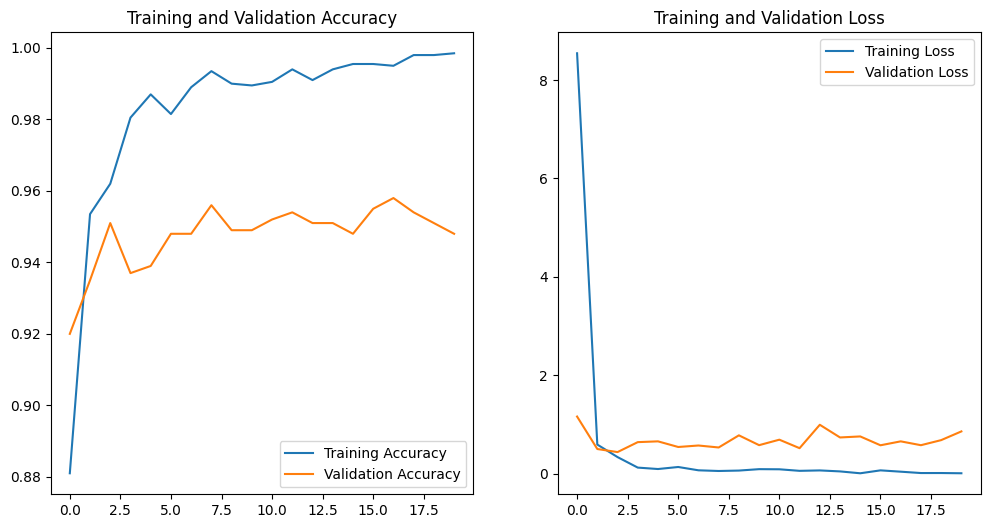

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.9538 - loss: 0.4037
테스트 정확도: 0.956


In [82]:


# 결과 시각화
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

# 학습 결과 시각화
plot_history(history)


test_model=tf.keras.models.load_model("fine_tuned_model.keras")
test_loss, test_acc=test_model.evaluate(test_dataset, verbose=1)
print(f"테스트 정확도: {test_acc:.3f}")